<a href="https://colab.research.google.com/github/acvats/Medical-Drugs--NLP/blob/master/Sentiment_Analysis_for_Medical_Drugs_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/arbazkhan971/analyticvidhyadatasetsentiment/metadata

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

In [2]:
!pip install kaggle

In [3]:
!mkdir .kaggle

In [4]:
cp '/content/drive/My Drive/kaggle auth key/kaggle.json' '/content/.kaggle/kaggle.json'

In [5]:
!chmod 600 /content/.kaggle/kaggle.json

In [6]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [7]:
cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
!kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31            327  
shivan118/healthcare-analytics                         Healthcare Analytics                                2MB  2020-09-13 17:40:05            212  
Cornell-University/arxiv                               arXiv Dataset                                     885MB  2020-09-14 16:54:47           2793  
nipunarora8/age-gender-and-ethnicity-face-data-csv     AGE, GENDER AND ETHNICITY (FACE DATA) CSV          63MB  2020-09-02 13:46:38            153  
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification       

In [10]:
!kaggle datasets download -d 'arbazkhan971/analyticvidhyadatasetsentiment'

 74% 5.00M/6.72M [00:00<00:00, 11.8MB/s]
100% 6.72M/6.72M [00:00<00:00, 15.1MB/s]


In [11]:
cd {/content}/datasets/

/content/{/content}/datasets


In [12]:
cd arbazkhan971/analyticvidhyadatasetsentiment

/content/{/content}/datasets/arbazkhan971/analyticvidhyadatasetsentiment


In [13]:
!mkdir data

In [14]:
ls


analyticvidhyadatasetsentiment.zip  data/


In [15]:
!unzip analyticvidhyadatasetsentiment.zip -d data

Archive:  analyticvidhyadatasetsentiment.zip
  inflating: data/sample_submission_i5xnIZD-1.csv  
  inflating: data/test_tOlRoBf.csv   
  inflating: data/train_F3WbcTw.csv  


In [16]:
ls

analyticvidhyadatasetsentiment.zip  data/


In [17]:
cd data

/content/{/content}/datasets/arbazkhan971/analyticvidhyadatasetsentiment/data


In [18]:
ls

sample_submission_i5xnIZD-1.csv  test_tOlRoBf.csv  train_F3WbcTw.csv


In [19]:
import pandas as pd
import numpy as np

In [20]:
train = pd.read_csv("train_F3WbcTw.csv")
test = pd.read_csv("test_tOlRoBf.csv")
sample_data = pd.read_csv("sample_submission_i5xnIZD-1.csv")

In [21]:
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [22]:
import re
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [23]:
train['text'] = train['text'].apply(cleanTxt)

In [24]:
train.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [25]:
y = train['sentiment']
y

0       2
1       2
2       2
3       2
4       1
       ..
5274    0
5275    2
5276    2
5277    2
5278    0
Name: sentiment, Length: 5279, dtype: int64

In [26]:
drug = train['drug']
drug

0          gilenya
1          gilenya
2       fingolimod
3          ocrevus
4          gilenya
           ...    
5274        alimta
5275       entyvio
5276        opdivo
5277      lucentis
5278       ocrevus
Name: drug, Length: 5279, dtype: object

In [27]:
hashkey=train['unique_hash']
train= train.drop(['unique_hash'], axis=1)

In [28]:
train = train.drop(['sentiment'], axis =1)

In [29]:
train = train.drop(['drug'], axis =1)

In [30]:
train.head()

,text
0,Autoimmune diseases tend to come in clusters. ...
1,I can completely understand why you’d want to ...
2,Interesting that it only targets S1P-1/5 recep...
3,"Very interesting, grand merci. Now I wonder wh..."
4,"Hi everybody, My latest MRI results for Brain ..."


In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer( stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(train.text))
train_tfv =  tfv.transform(train.text)

In [33]:
print(train_tfv)

  (0, 39537)	0.09272405609554316
  (0, 39336)	0.22317763562270507
  (0, 39243)	0.1494801909945628
  (0, 38772)	0.23151575964309914
  (0, 38448)	0.14656410447063348
  (0, 38133)	0.09797321396250812
  (0, 37261)	0.1275463447604975
  (0, 36322)	0.08174613659909444
  (0, 36104)	0.09824151210830873
  (0, 35811)	0.1832484080629544
  (0, 35467)	0.10380569928606062
  (0, 35306)	0.10457734544641244
  (0, 31210)	0.2174559276161316
  (0, 28147)	0.12941886149773105
  (0, 23958)	0.11825619298768592
  (0, 20630)	0.1780533193823987
  (0, 20187)	0.08005950386823431
  (0, 19760)	0.21160996750353717
  (0, 16317)	0.08908626359701056
  (0, 16047)	0.10569570336601117
  (0, 14504)	0.22067408849851625
  (0, 13288)	0.19252276578548952
  (0, 13242)	0.16732607934086013
  (0, 12012)	0.28449181752812475
  (0, 11959)	0.2743062273566927
  :	:
  (5278, 26114)	0.14083191602009593
  (5278, 25812)	0.10507628413706042
  (5278, 25616)	0.1230354957943872
  (5278, 25087)	0.18257315858229106
  (5278, 24138)	0.17530411062587

In [34]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(train_tfv, y, test_size=0.2, random_state=52) 

In [35]:
X_train.shape

(4223, 39857)

In [36]:
X_test.shape

(1056, 39857)

In [37]:
y_train.shape

(4223,)

In [38]:
y_test.shape

(1056,)

In [39]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [40]:
from sklearn.linear_model import LogisticRegression

# Fitting a simple Logistic Regression on TFIDF
clfLR = LogisticRegression(C=1.0)
clfLR.fit(X_train, y_train)
predictions = clfLR.predict_proba(X_test)

print ("logloss: %0.3f " % multiclass_logloss(y_test, predictions))

logloss: 0.674 


In [41]:
 from sklearn.naive_bayes import MultinomialNB

clfMNB = MultinomialNB()
clfMNB.fit(X_train, y_train)
predictions = clfMNB.predict_proba(X_test)

print ("logloss: %0.3f " % multiclass_logloss(y_test, predictions))

logloss: 1.586 


In [42]:
from sklearn.svm import SVC
# Fitting a simple SVM
clfSVC = SVC(C=1.0, probability=True) # since we need probabilities
clfSVC.fit(X_train, y_train)
predictions = clfSVC.predict_proba(X_test)

print ("logloss: %0.3f " % multiclass_logloss(y_test, predictions))

logloss: 0.683 


In [43]:
ls

sample_submission_i5xnIZD-1.csv  test_tOlRoBf.csv  train_F3WbcTw.csv


DATASET BALANCING and EDA

In [44]:
train_2= pd.read_csv("train_F3WbcTw.csv")

In [45]:
train_2.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [46]:
train_2['text'].unique()

array(['Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.',
       'I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gath

In [47]:
train_2['drug'].unique()

array(['gilenya', 'fingolimod', 'ocrevus', 'cladribine', 'humira',
       'tagrisso', 'lucentis', 'pan-retinal photocoagulation', 'remicade',
       'stelara', 'ocrelizumab', 'dexamethasone', 'pemetrexed', 'cimzia',
       'tarceva', 'nivolumab', 'tecentriq', 'ipilimumab', 'mekinist',
       'opdivo', 'dexamethasone implant', 'eylea', 'erlotinib',
       'alectinib', 'entyvio', 'crizotinib', 'keytruda', 'mavenclad',
       'osimertinib', 'vedolizumab', 'atezolizumab', 'durvalumab',
       'alimta', 'tysabri', 'avastin', 'golimumab', 'tofacitinib',
       'ixifi', 'teriflunomide', 'ranibizumab', 'afatinib',
       'upadacitinib', 'zykadia', 'ustekinumab', 'xalkori',
       'pembrolizumab', 'lemtrada', 'siponimod', 'simponi', 'inflectra',
       'entrectinib', 'yervoy', 'vitrectomy', 'bevacizumab', 'gefitinib',
       'amjevita', 'lorlatinib', 'pemrolizumab', 'tafinlar',
       'infliximab-dyyb', 'ozurdex', 'gilotrif', 'imfinzi', 'iressa',
       'laser photocoagulation', 'renflexis', 'a

In [48]:
train_2['sentiment'].unique()

array([2, 1, 0])

In [49]:
import re
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train_2['text']=train_2['text'].apply(lambda x:expand_contractions(x))

In [50]:
train_2.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1


In [51]:
train_2['cleaned']=train_2['text'].apply(lambda x: x.lower())

In [52]:
train_2['cleaned']=train_2['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

this removes words with digit, but incase of medical data not sure if this will be a good option to do

In [53]:
train_2.head()

,unique_hash,text,drug,sentiment,cleaned
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,autoimmune diseases tend to come in clusters. ...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,i can completely understand why you’d want to ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,interesting that it only targets -/ receptors ...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,"very interesting, grand merci. now i wonder wh..."
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,"hi everybody, my latest mri results for brain ..."


Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:

In [54]:
import string
train_2['cleaned']=train_2['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [55]:

# Removing extra spaces
train_2['cleaned']=train_2['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [56]:
train_2.head()

,unique_hash,text,drug,sentiment,cleaned
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,autoimmune diseases tend to come in clusters a...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,i can completely understand why you’d want to ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,interesting that it only targets receptors rat...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,very interesting grand merci now i wonder wher...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,hi everybody my latest mri results for brain a...


In [57]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
train_2['lemmatized']=train_2['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [58]:
train_2.head()

,unique_hash,text,drug,sentiment,cleaned,lemmatized
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,autoimmune diseases tend to come in clusters a...,autoimmune disease tend come cluster gilenya –...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,i can completely understand why you’d want to ...,completely understand want try result report l...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,interesting that it only targets receptors rat...,interesting target receptor like fingolimod ho...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,very interesting grand merci now i wonder wher...,interesting grand merci wonder lemtrada ocrevu...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,hi everybody my latest mri results for brain a...,hi everybody late mri result brain cervical co...


In [59]:
df_grouped=train_2[['drug','lemmatized']].groupby(by='drug').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
drug,
afatinib,age f swedish diagnose stage iv nsclc lpa egfr...
aflibercept,agerelate macular degeneration amd amrd term a...
alecensa,hi thank reply jimc try brain met resolve cybe...
alectinib,epicapture urine dna methylation test early de...
alectnib,hi welcome post specific thread november list ...


In [60]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaaai,aaaaiamerican,aaarrrrrrgggghhhhhhh,aacr,aad,aah,aami,aan,aand,aao,aap,aar,aarhus,aaron,aaronbosterohiohealthcom,aaronsgurl,aarp,aassociation,aat,aav,ab,aback,abacus,abandon,abandonment,abasalt,abatacept,abate,abavishiaeriepharmacom,abbattista,abbildung,abbott,abbreviate,abbreviation,abbv,abbvie,abbviepartnere,abbvvie,abby,...,zovirax,zoë,zscore,ztlearne,zugazagoitia,zulfihan,zuma,zumba,zur,zurich,zwarenstein,zyclara,zydis,zydus,zyflamend,zygoura,zykadia,zyklon,zyme,zypreksuh,zyprexa,zytiga,µgday,µm,µopioid,½inch,às,œimmediate,śand,śthe,αc,αjuvenile,βagonist,βblocker,βthalassemia,δopioid,μg,μl,μm,ﬁrstline
drug,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
afatinib,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
aflibercept,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alecensa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


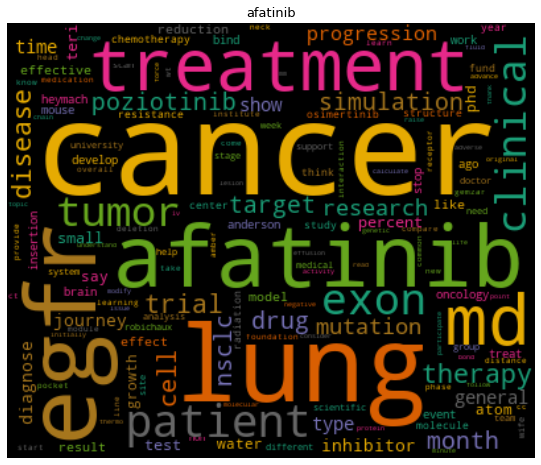

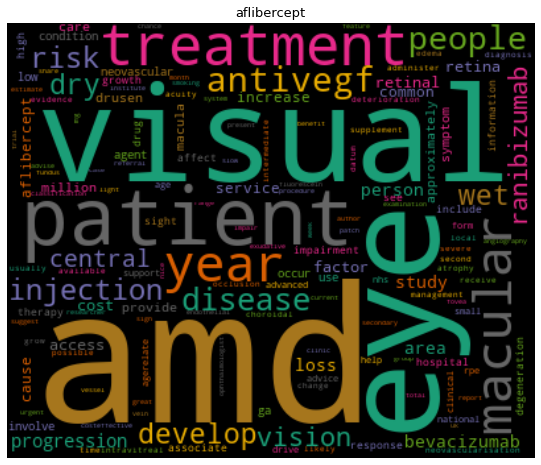

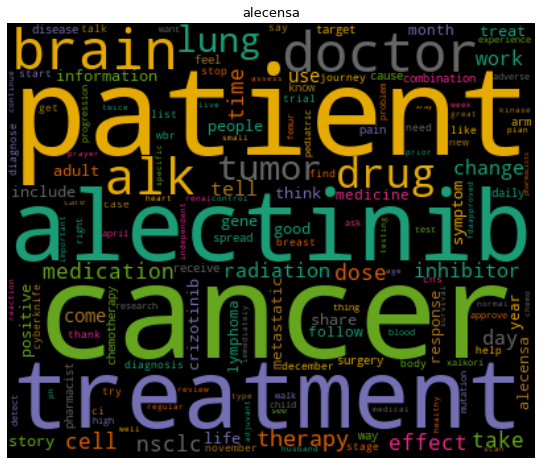

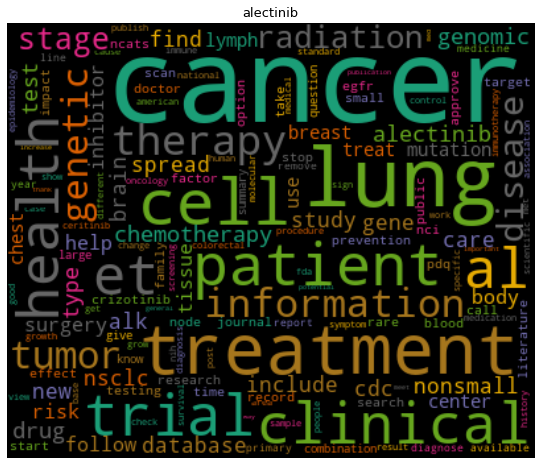

ZeroDivisionError: ignored

In [61]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [64]:
from textblob import TextBlob
train_2['polarity']=train_2['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [66]:

print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(train_2.iloc[train_2['polarity'].sort_values(ascending=False)[:3].index]['text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 Awesome to hear! Get some rest!! Diagnosed Nov 2012 after birth of first child, Left sided UC Remicade, 6mp Visbiome 450 billion, prenatal vitamin, vit D, biotin, fiber, enemas only if needed You gotta learn to dance in the rain
Review 2:
 Back in December 2017, BioPharmaDive regarded Ocrevus as the most impressive drug launch of 2017--"Most Impressive Drug Launch: Roche is Ocrevus."
Review 3:
 If you haven’t yet done this, I suggest you join the Ocrevus group on Facebook. It’s an excellent source of information from other people who are using Ocrevus. https://www.facebook.com/groups/653313891487070/


In [68]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(train_2.iloc[train_2['polarity'].sort_values(ascending=True)[:3].index]['text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Hi Jamie, Your experiences with Ocrevus since you began this DMT have been horrible. Have you talked about this with the nurses at Biogen’s support service, Above MS? Also, I’d like to use excerpts from some of your posts in my column on MS News Today to illustrate this lack of communication problem. May I? Ed
Review 2:
 My memory is so crap that I forgot to take mine quite a few times. I’ve come off it now in preparation for starting Gilenya in May (I stopped Tec about a fortnight ago) and I haven’t noticed any change whatsoever so I wouldn’t worry! Hope you get better soon.x
Review 3:
 Thank you for writing this post. I am sick for the first time since being on Ocrevus and it is taking a hefty toll. I myself prefer see barrel proof bourbon to knock the crud out (and myself)!


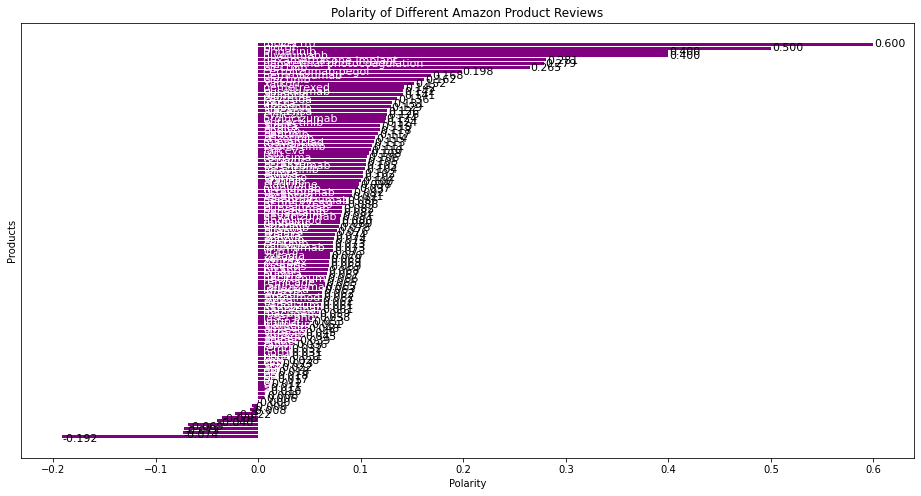

In [70]:

product_polarity_sorted=pd.DataFrame(train_2.groupby('drug')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [71]:
train_2.head()

,unique_hash,text,drug,sentiment,cleaned,lemmatized,polarity
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,autoimmune diseases tend to come in clusters a...,autoimmune disease tend come cluster gilenya –...,0.375000
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2,i can completely understand why you’d want to ...,completely understand want try result report l...,0.250694
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,interesting that it only targets receptors rat...,interesting target receptor like fingolimod ho...,0.238101
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,very interesting grand merci now i wonder wher...,interesting grand merci wonder lemtrada ocrevu...,0.500000
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,hi everybody my latest mri results for brain a...,hi everybody late mri result brain cervical co...,0.247727


In [105]:
train_orginal_data = pd.read_csv("train_F3WbcTw.csv")

In [106]:
train_orginal_data.count

<bound method DataFrame.count of                                    unique_hash  ... sentiment
0     2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0  ...         2
1     9eba8f80e7e20f3a2f48685530748fbfa95943e4  ...         2
2     fe809672251f6bd0d986e00380f48d047c7e7b76  ...         2
3     bd22104dfa9ec80db4099523e03fae7a52735eb6  ...         2
4     b227688381f9b25e5b65109dd00f7f895e838249  ...         1
...                                        ...  ...       ...
5274  5b5d129f3bab30fbb4740540a16856907657f005  ...         0
5275  1aa7dde5dc5249ebc3490c1fbac6ca6df48753a2  ...         2
5276  e9159c3f836f453f5f133008d40b7e65f9e70a42  ...         2
5277  63d57717bd0cf650f91a5137bd1b427ba922edea  ...         2
5278  c29143e9c1c299847e437412649b5738d861b9d0  ...         0

[5279 rows x 4 columns]>

In [91]:
sentiment_count = train_orginal_data.sentiment.value_counts()
print('Class 0:', sentiment_count[0])
print('Class 1:', sentiment_count[1])
print('Class 2:', sentiment_count[2])

Class 0: 617
Class 1: 837
Class 2: 3825


Text(0, 0.5, 'Number of Review')

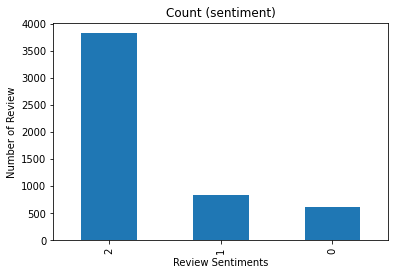

In [92]:
sentiment_count.plot(kind='bar', title='Count (sentiment)');
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')

In [98]:
train_2.columns

Index(['unique_hash', 'text', 'drug', 'sentiment', 'cleaned', 'lemmatized',
       'polarity'],
      dtype='object')

In [101]:
train_2_y = train_2['sentiment']

In [107]:
train_2_y.head

<bound method NDFrame.head of 0       2
1       2
2       2
3       2
4       1
       ..
5274    0
5275    2
5276    2
5277    2
5278    0
Name: sentiment, Length: 5279, dtype: int64>

In [108]:
train_2_X = train_2.drop(['sentiment'], axis =1)

In [118]:
train_2_X.head

<bound method NDFrame.head of                                    unique_hash  ...  polarity
0     2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0  ...  0.375000
1     9eba8f80e7e20f3a2f48685530748fbfa95943e4  ...  0.250694
2     fe809672251f6bd0d986e00380f48d047c7e7b76  ...  0.238101
3     bd22104dfa9ec80db4099523e03fae7a52735eb6  ...  0.500000
4     b227688381f9b25e5b65109dd00f7f895e838249  ...  0.247727
...                                        ...  ...       ...
5274  5b5d129f3bab30fbb4740540a16856907657f005  ...  0.262150
5275  1aa7dde5dc5249ebc3490c1fbac6ca6df48753a2  ...  0.101042
5276  e9159c3f836f453f5f133008d40b7e65f9e70a42  ...  0.700000
5277  63d57717bd0cf650f91a5137bd1b427ba922edea  ...  0.210417
5278  c29143e9c1c299847e437412649b5738d861b9d0  ...  0.169781

[5279 rows x 6 columns]>

In [119]:
train_2_X.columns

Index(['unique_hash', 'text', 'drug', 'cleaned', 'lemmatized', 'polarity'], dtype='object')

In [111]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros,y_ros = ros.fit_sample(train_2_X,train_2_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [112]:
from collections import Counter
print('Original dataset Shape {}'.format(Counter(y)))
print('Resampled dataset Shape {}'.format(Counter(y_ros)))

Original dataset Shape Counter({2: 3825, 1: 837, 0: 617})
Resampled dataset Shape Counter({2: 3825, 1: 3825, 0: 3825})


In [120]:
x_ros

array([['2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0',
        'Autoimmune diseases tend to come in clusters. As for Gilenya – if you feel good, don’t think about it, it won’t change anything but waste your time and energy. I’m taking Tysabri and feel amazing, no symptoms (other than dodgy color vision, but I’ve had it since always, so, don’t know) and I don’t know if it will last a month, a year, a decade, ive just decided to enjoy the ride, no point in worrying.',
        'gilenya',
        'autoimmune diseases tend to come in clusters as for gilenya – if you feel good don’t think about it it won’t change anything but waste your time and energy i’m taking tysabri and feel amazing no symptoms other than dodgy color vision but i’ve had it since always so don’t know and i don’t know if it will last a month a year a decade ive just decided to enjoy the ride no point in worrying',
        'autoimmune disease tend come cluster gilenya – feel good think will change waste time energy take tysab

In [121]:
X_balcd_final = pd.DataFrame({'unique_hash': x_ros[:, 0], 'text': x_ros[:, 1], 'drug': x_ros[:, 2], 'cleaned': x_ros[:, 3], 'lemmatized': x_ros[:, 4], 'polarity': x_ros[:, 5]})

In [125]:
X_balcd_final.head

<bound method NDFrame.head of                                     unique_hash  ...    polarity
0      2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0  ...       0.375
1      9eba8f80e7e20f3a2f48685530748fbfa95943e4  ...    0.250694
2      fe809672251f6bd0d986e00380f48d047c7e7b76  ...    0.238101
3      bd22104dfa9ec80db4099523e03fae7a52735eb6  ...         0.5
4      b227688381f9b25e5b65109dd00f7f895e838249  ...    0.247727
...                                         ...  ...         ...
11470  803b355769b40f45fefe198dd867e438a0f6996d  ...    0.433571
11471  624d5254a19ba96c98e112ff4b6872a3ab6ca1b4  ...   0.0166667
11472  f073bf205c1ad1c5266de67ecc698448a8adea4d  ...  0.00833333
11473  f589caa23b858fb16f0a8ddc2f3f33939bedbbe5  ...      0.0625
11474  87490c4dfabdbf420a8fc2912a399988f3dbb3d8  ...  -0.0193773

[11475 rows x 6 columns]>

In [124]:
X_balcd_final.columns

Index(['unique_hash', 'text', 'drug', 'cleaned', 'lemmatized', 'polarity'], dtype='object')

In [115]:
y_ros

array([2, 2, 2, ..., 1, 1, 1])

In [116]:
y_balcd_final = pd.DataFrame({'sentiment': y_ros})

In [117]:
y_balcd_final.head

<bound method NDFrame.head of        sentiment
0              2
1              2
2              2
3              2
4              1
...          ...
11470          1
11471          1
11472          1
11473          1
11474          1

[11475 rows x 1 columns]>

In [126]:
X_balcd_final_lemmatized = X_balcd_final['lemmatized']

In [127]:
X_balcd_final_lemmatized.head

<bound method NDFrame.head of 0        autoimmune disease tend come cluster gilenya –...
1        completely understand want try result report l...
2        interesting target receptor like fingolimod ho...
3        interesting grand merci wonder lemtrada ocrevu...
4        hi everybody late mri result brain cervical co...
                               ...                        
11470    respond right hope ask nonchemo option like rf...
11471    dad diagnose stage lung cancer september round...
11472    diagnose mild uc november go downhill humira t...
11473    copaxone year major relapse severe damage — so...
11474    hello father diagnose stage iv nsclc dec later...
Name: lemmatized, Length: 11475, dtype: object>

In [130]:
tfv_bal = TfidfVectorizer( stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv_bal.fit(list(X_balcd_final_lemmatized))
X_balcd_tfv =  tfv_bal.transform(X_balcd_final_lemmatized)

In [132]:
X_balcd_tfv

<11475x36889 sparse matrix of type '<class 'numpy.float64'>'
	with 968546 stored elements in Compressed Sparse Row format>

In [134]:
(X_train_bal, X_test_bal, y_train_bal, y_test_bal) = train_test_split(X_balcd_tfv, y_ros, test_size =.25, random_state =52)

In [135]:
from sklearn.linear_model import LogisticRegression

# Fitting a simple Logistic Regression on TFIDF
clfLR = LogisticRegression(C=1.0)
clfLR.fit(X_train_bal, y_train_bal)
predictions = clfLR.predict_proba(X_test_bal)

print ("logloss: %0.3f " % multiclass_logloss(y_test_bal, predictions))

logloss: 0.534 


In [136]:
 from sklearn.naive_bayes import MultinomialNB

clfMNB = MultinomialNB()
clfMNB.fit(X_train_bal, y_train_bal)
predictions = clfMNB.predict_proba(X_test_bal)

print ("logloss: %0.3f " % multiclass_logloss(y_test_bal, predictions))

logloss: 0.686 


In [137]:
from sklearn.svm import SVC
# Fitting a simple SVM
clfSVC = SVC(C=1.0, probability=True) # since we need probabilities
clfSVC.fit(X_train_bal, y_train_bal)
predictions = clfSVC.predict_proba(X_test_bal)

print ("logloss: %0.3f " % multiclass_logloss(y_test_bal, predictions))

logloss: 0.098 
